# 生命周期的回归算法

利用设备的故障和警告数据，拟合出一个故障率曲线，从而得到设备历史日期的故障率，再根据故障率对设备进行生命阶段的划分。

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
# 导入多项式回归模型
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

参数Eta的确定：

![](./eta.png)

In [2]:
def getEta(xArr):
    """
    返回参数 η：依塔 Eta
    :param xArr:
    :return:
    """
    eta = []
    for i, tn in enumerate(xArr):
        item = tn
        if i == 0:
            item += tn / len(xArr)
            eta.append(item)
        else:
            count = 0
            for j in range(i, -1, -1):
                if j < 0: continue
                if xArr[i] == xArr[j - 1]:
                    count += 1
                    continue
                else:
                    item += (tn - xArr[i - count - 1]) / ((count + 1) * len(xArr))
                    eta.append(item)
                    break
    return eta

## 故障率函数

![](./rate.png)

In [3]:
def failRate(xArr):
    """
    故障率函数
    :param xArr:
    :return:
    """
    eta = getEta(xArr)
    t = np.array(xArr)
#     print(eta)
#     print(t)
#     print(len(eta))
#     print(len(t))
    xMat = t/eta
    x = xMat

    alpha, beta, lamda = 0.5384, 0.1967, 0.8499

    """故障率函数"""
    res = ((lamda*np.power(x, alpha-1))/(eta*np.power(1-x, beta+1)))*((beta-alpha)*x+alpha)
    return res

In [4]:
def distinct(xArr, yArr):
    """去重"""
    X, Y = [], []
    for i in range(0, len(xArr)):
        x, y = xArr[i], yArr[i]
        for j in range(i+1, len(xArr)):
            if xArr[i] != xArr[j]:
                X.append(x)
                Y.append(yArr[j-1])
                break
            else:
                if j == len(xArr)-1:
                    X.append(x)
                    Y.append(yArr[j])
                break
    return X, Y

In [5]:
xArr = [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 6, 11, 15, 19, 25, 28, 30, 33, 38, 44, 48, 53, 56, 57, 57, 58, 58, 59, 59, 59, 60, 60, 60, 60]
yArr = failRate(xArr)
x, y = distinct(xArr, yArr)
# print(x)
# print(y)
# print(yArr)
# print(len(x))
# print(len(y))
y[0] = 100

/home/zeno/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in power


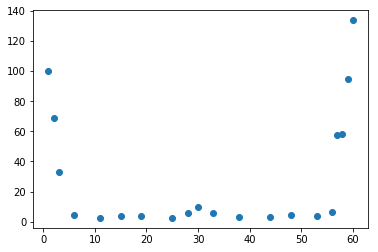

In [6]:
plt.scatter(x, y)
plt.show()

## 使用四次多项式回归进行拟合数据

$$
f(x) = w_{0} + w_{1}x^1 + w_{2}x^2 + w_{3}x^3 + w_{4}x^4
$$

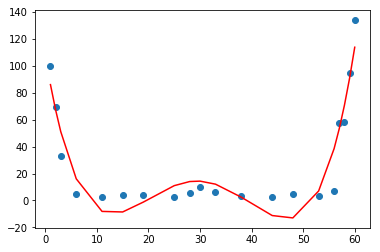

In [7]:
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
X = np.array(x)
X = X.reshape(-1, 1)

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [8]:
# coef = poly_reg.named_steps['lin_reg'].coef_
# inter = poly_reg.named_steps['lin_reg'].intercept_
# print(coef)
# print('y = {}x + {}x^2 + {}x^3 + {}x^4'.format(coef[1], coef[2], coef[3], coef[4]))

In [9]:
res = poly_reg.predict([[30], [60]])
res

array([ 14.37159055, 113.72893503])

In [10]:
xx = np.arange(1, 61)
XX = np.array(xx)
XX
# res = poly_reg.predict(xx)
# res

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [11]:
x

[1, 2, 3, 6, 11, 15, 19, 25, 28, 30, 33, 38, 44, 48, 53, 56, 57, 58, 59, 60]

In [12]:
xx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

## 预测设备历史日期的故障率

In [13]:
XX = XX.reshape(-1, 1)
res = poly_reg.predict(XX)
res

array([ 8.59854242e+01,  6.72032742e+01,  5.10299409e+01,  3.72547227e+01,
        2.56746565e+01,  1.60945173e+01,  8.32681840e+00,  2.19181154e+00,
       -2.48251333e+00, -5.86042797e+00, -8.09846581e+00, -9.34542199e+00,
       -9.74235336e+00, -9.42257845e+00, -8.51167751e+00, -7.12749249e+00,
       -5.38012703e+00, -3.37194646e+00, -1.19757785e+00,  1.05609006e+00,
        3.30990683e+00,  5.49246031e+00,  7.54007664e+00,  9.39682029e+00,
        1.10144940e+01,  1.23526388e+01,  1.33785341e+01,  1.40671974e+01,
        1.44013848e+01,  1.43715906e+01,  1.39760471e+01,  1.32207253e+01,
        1.21193344e+01,  1.06933217e+01,  8.97187309e+00,  6.99191249e+00,
        4.79810229e+00,  2.44284313e+00, -1.37260612e-02, -2.50372804e+00,
       -4.95154726e+00, -7.27382989e+00, -9.37948380e+00, -1.11696785e+01,
       -1.25378454e+01, -1.33696773e+01, -1.35431290e+01, -1.29284167e+01,
       -1.13880187e+01, -8.77667452e+00, -4.94138579e+00,  2.78584352e-01,
        7.05171105e+00,  

## 生命阶段的划分

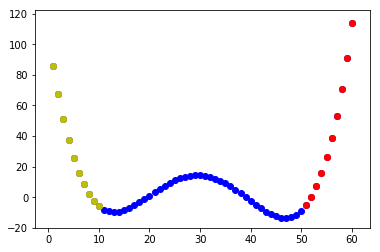

In [14]:
plt.scatter(xx, res, color='b')
plt.scatter(xx[0:10], res[0:10], color='y')
plt.scatter(xx[50:], res[50:], color='r')
# plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [25]:
R = []

for i in range(len(x)):
    R.append([x[i], y[i]])

R

[[1, 100],
 [2, 69.0867438907515],
 [3, 32.73769323941385],
 [6, 4.497349533254043],
 [11, 2.741038050778312],
 [15, 3.756733112063831],
 [19, 3.9203199862104574],
 [25, 2.5522393804068773],
 [28, 5.927083308349031],
 [30, 9.732716919865183],
 [33, 6.114828751997062],
 [38, 3.42122803490577],
 [44, 2.8320064134861997],
 [48, 4.662818689261028],
 [53, 3.643136073050456],
 [56, 6.767463635982621],
 [57, 57.78092505161458],
 [58, 57.97831220555592],
 [59, 94.48512312321348],
 [60, 133.74206381729667]]